### Encoding, Linear Regression, Performance Analysis on Audi Used Car Dataset

Audity Ghosh
<br>3rd Year, CSE, RUET

#### Objectives:
- Label Encoder and One hot encoding
- Supervised Learning: Linear Regression
- coefficients and y-intercept value of linear regression model
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared or coefficient of determination
- Prediction result evaluation
- Compare the actual and predicted target variable through visualization


##### Importing Libraries

In [211]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


pd.set_option("display.max_columns", None)

#### (A) Loading the dataset

In [212]:
df = pd.read_csv("audi.csv")

display(df.head())
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


(10668, 8)


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


In [214]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


In [215]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

#### (B) Perform One Hot Encoding

Here, we can see there are 3 categorical variables called 'model', 'transmission', 'fuelType'. Here, I will perform One hot encoding because there is no order or level among the values of these variables, so I will not use Label Encoder for the catgorical variables here.

###### Encoding 'model' column

In [216]:
print(len(df['model'].unique()))
df["model"].value_counts()

26


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [217]:
dummy_model = pd.get_dummies(df['model'],prefix='model_',drop_first=True)
display(dummy_model)

,model__ A2,model__ A3,model__ A4,model__ A5,model__ A6,model__ A7,model__ A8,model__ Q2,model__ Q3,model__ Q5,model__ Q7,model__ Q8,model__ R8,model__ RS3,model__ RS4,model__ RS5,model__ RS6,model__ RS7,model__ S3,model__ S4,model__ S5,model__ S8,model__ SQ5,model__ SQ7,model__ TT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10664,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10665,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10666,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [218]:
df = pd.merge(
    left=df,
    right=dummy_model,
    left_index=True,
    right_index=True,
)
display(df.sample(20))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,model__ A2,model__ A3,model__ A4,model__ A5,model__ A6,model__ A7,model__ A8,model__ Q2,model__ Q3,model__ Q5,model__ Q7,model__ Q8,model__ R8,model__ RS3,model__ RS4,model__ RS5,model__ RS6,model__ RS7,model__ S3,model__ S4,model__ S5,model__ S8,model__ SQ5,model__ SQ7,model__ TT
1991,A4,2017,18101,Manual,22309,Petrol,51.4,1.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3006,A3,2019,29256,Semi-Auto,7825,Petrol,34.9,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7672,Q3,2020,32444,Automatic,1500,Petrol,31.4,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1810,A6,2017,20250,Semi-Auto,41272,Diesel,61.4,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1176,RS4,2019,56991,Semi-Auto,4761,Petrol,29.1,2.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1060,Q2,2019,25888,Automatic,4444,Petrol,42.2,1.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7696,A3,2018,19450,Manual,7900,Petrol,47.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8837,A4,2016,15800,Manual,45907,Diesel,64.2,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4014,Q2,2018,20750,Semi-Auto,30200,Petrol,52.3,1.4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4199,A3,2019,19750,Manual,4270,Petrol,47.1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###### Encoding 'transmission' column

In [219]:
print(len(df['transmission'].unique()))
df["transmission"].value_counts()

3


Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [220]:
dummy_transmission = pd.get_dummies(df['transmission'],prefix='transmission_',drop_first=True)
display(dummy_transmission)

,transmission__Manual,transmission__Semi-Auto
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
10663,1,0
10664,1,0
10665,1,0
10666,0,0


In [221]:
df = pd.merge(
    left=df,
    right=dummy_transmission,
    left_index=True,
    right_index=True,
)
display(df.sample(20))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,model__ A2,model__ A3,model__ A4,model__ A5,model__ A6,model__ A7,model__ A8,model__ Q2,model__ Q3,model__ Q5,model__ Q7,model__ Q8,model__ R8,model__ RS3,model__ RS4,model__ RS5,model__ RS6,model__ RS7,model__ S3,model__ S4,model__ S5,model__ S8,model__ SQ5,model__ SQ7,model__ TT,transmission__Manual,transmission__Semi-Auto
8881,TT,2015,13500,Manual,64850,Petrol,47.9,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6548,Q2,2020,24888,Manual,1500,Petrol,45.6,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3985,A1,2017,12995,Manual,24546,Petrol,56.5,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2785,A1,2016,9980,Manual,30394,Petrol,67.3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2114,A4,2016,13995,Semi-Auto,56615,Diesel,70.6,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2470,A3,2018,20500,Automatic,10010,Petrol,56.5,1.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8676,A5,2019,32950,Automatic,5630,Diesel,50.4,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5326,Q2,2019,20834,Manual,5880,Diesel,49.6,1.6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10077,A4,2016,15000,Automatic,31670,Diesel,72.4,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9748,Q3,2016,15699,Manual,52080,Diesel,52.3,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


###### Encoding 'fuelType' column

In [222]:
print(len(df['fuelType'].unique()))
df["fuelType"].value_counts()

3


Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [223]:
dummy_fuelType = pd.get_dummies(df['fuelType'],prefix='fuelType_',drop_first=True)
display(dummy_fuelType)

,fuelType__Hybrid,fuelType__Petrol
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
10663,0,1
10664,0,1
10665,0,1
10666,0,1


In [224]:
df = pd.merge(
    left=df,
    right=dummy_fuelType,
    left_index=True,
    right_index=True,
)
display(df.sample(20))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,model__ A2,model__ A3,model__ A4,model__ A5,model__ A6,model__ A7,model__ A8,model__ Q2,model__ Q3,model__ Q5,model__ Q7,model__ Q8,model__ R8,model__ RS3,model__ RS4,model__ RS5,model__ RS6,model__ RS7,model__ S3,model__ S4,model__ S5,model__ S8,model__ SQ5,model__ SQ7,model__ TT,transmission__Manual,transmission__Semi-Auto,fuelType__Hybrid,fuelType__Petrol
4529,A6,2019,28490,Automatic,7500,Diesel,47.9,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1122,Q3,2014,15698,Manual,26728,Diesel,50.4,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8398,Q3,2016,14406,Manual,58689,Diesel,60.1,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5619,RS5,2018,42500,Semi-Auto,28249,Petrol,32.5,2.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
7771,A3,2017,13977,Semi-Auto,57000,Diesel,72.4,1.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
243,A3,2019,21995,Manual,10,Diesel,54.3,1.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5355,A4,2019,23990,Manual,6267,Petrol,38.2,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1384,A5,2015,12990,Automatic,43811,Diesel,58.9,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8815,TT,2017,27000,Automatic,9610,Petrol,41.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1279,A4,2016,11698,Manual,72981,Diesel,74.3,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [225]:
df = df.drop(columns=['model', 'transmission','fuelType'])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     10668 non-null  int64  
 1   price                    10668 non-null  int64  
 2   mileage                  10668 non-null  int64  
 3   mpg                      10668 non-null  float64
 4   engineSize               10668 non-null  float64
 5   model__ A2               10668 non-null  uint8  
 6   model__ A3               10668 non-null  uint8  
 7   model__ A4               10668 non-null  uint8  
 8   model__ A5               10668 non-null  uint8  
 9   model__ A6               10668 non-null  uint8  
 10  model__ A7               10668 non-null  uint8  
 11  model__ A8               10668 non-null  uint8  
 12  model__ Q2               10668 non-null  uint8  
 13  model__ Q3               10668 non-null  uint8  
 14  model__ Q5            

#### (C) Split the dataset into train and test

In [227]:

X = df.drop('price', axis=1)
y = df[target]

display(X.head())
print(X.shape)
print(y.shape)


,year,mileage,mpg,engineSize,model__ A2,model__ A3,model__ A4,model__ A5,model__ A6,model__ A7,model__ A8,model__ Q2,model__ Q3,model__ Q5,model__ Q7,model__ Q8,model__ R8,model__ RS3,model__ RS4,model__ RS5,model__ RS6,model__ RS7,model__ S3,model__ S4,model__ S5,model__ S8,model__ SQ5,model__ SQ7,model__ TT,transmission__Manual,transmission__Semi-Auto,fuelType__Hybrid,fuelType__Petrol
0,2017,15735,55.4,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2016,36203,64.2,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016,29946,55.4,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2017,25952,67.3,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,1998,49.6,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


(10668, 33)
(10668,)


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534,) (2134,)


#### (D) Linear Regression and Prediction

In [229]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### (E) Coefficients and Intercepts of Linear Regression Model

In [230]:
coefficients = model.coef_
print(coefficients)

[ 2.02426273e+03 -7.60956537e-02 -1.69246070e+02  4.25397380e+03
  2.25789491e+04  1.28984286e+03  1.59468836e+03  2.66742740e+03
  3.61596237e+03  4.17450974e+03  8.12994033e+03  7.33690353e+02
  2.64325822e+03  6.63934079e+03  1.51972424e+04  2.61682974e+04
  5.84973722e+04  9.16846823e+03  2.04662163e+04  1.82852896e+04
  2.56291070e+04  1.42154022e-09  3.49441546e+03  9.43997888e+03
  1.29599622e+03  4.25410479e+03  8.18448332e+03  1.91566875e+04
  3.10652179e+03 -1.20598677e+03  1.04877197e+02  2.33994959e+04
 -4.13925048e+02]


In [231]:
coef_df = pd.DataFrame({"features": X.columns, 
                       "coefficients": np.squeeze(coefficients)})

display(coef_df)

,features,coefficients
0,year,2.024263e+03
1,mileage,-7.609565e-02
2,mpg,-1.692461e+02
3,engineSize,4.253974e+03
4,model__ A2,2.257895e+04
5,model__ A3,1.289843e+03
6,model__ A4,1.594688e+03
7,model__ A5,2.667427e+03
8,model__ A6,3.615962e+03
9,model__ A7,4.174510e+03


A positive coefficient indicates that as the value of the independent variable(feature) increases, the dependent variable('price') also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [232]:
c = model.intercept_
print(c)

-4060707.7430759836


#### Prediction

In [233]:
y_pred = model.predict(X_test)
print(y_pred)

[ 6610.13223031 24138.50809734 29867.94104515 ... 16285.06313705
 24273.50178707 10427.25104041]


In [234]:
print(y_test)

10442     9990
2907     22382
7388     28990
3016     30777
7890     14950
         ...  
8606     31450
8977     12900
3673     16750
1034     21996
6867      9547
Name: price, Length: 2134, dtype: int64


### Compute Key Performance Indicators from actual and predicted data

**Mean absolute error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

**Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.

**Coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

**Mean Absolute Percentage Error** MAPE can be considered as a loss function to define the error termed by the model evaluation. Using MAPE, we can estimate the accuracy in terms of the differences in the actual v/s estimated values.MAE is the average magnitude of error produced by your model, the MAPE is how far the model's predictions are off from their corresponding outputs on average.

In [235]:
y_test

10442     9990
2907     22382
7388     28990
3016     30777
7890     14950
         ...  
8606     31450
8977     12900
3673     16750
1034     21996
6867      9547
Name: price, Length: 2134, dtype: int64

In [236]:
y_pred

array([ 6610.13223031, 24138.50809734, 29867.94104515, ...,
       16285.06313705, 24273.50178707, 10427.25104041])

In [237]:
y_pred_f = y_pred.flatten()
y_pred_f

array([ 6610.13223031, 24138.50809734, 29867.94104515, ...,
       16285.06313705, 24273.50178707, 10427.25104041])

In [238]:
y_test_np = y_test.to_numpy()
y_test_np

array([ 9990, 22382, 28990, ..., 16750, 21996,  9547], dtype=int64)

In [239]:
y_test_f = y_test_np.flatten()
y_test_f

array([ 9990, 22382, 28990, ..., 16750, 21996,  9547], dtype=int64)

In [240]:
df_pred_actual = pd.DataFrame({"actual":y_test_f,
                   "predicted": y_pred_f})
df_pred_actual["dif"] = df_pred_actual["actual"] - df_pred_actual["predicted"]
df_pred_actual["abs_error"] = np.abs(df_pred_actual["dif"])
df_pred_actual["squared_error"] = df_pred_actual["dif"]**2

df_pred_actual["actual_subtract_mean"] = df_pred_actual["actual"] - df_pred_actual["actual"].mean()
df_pred_actual["squared_actual_subtract_mean"] = df_pred_actual["actual_subtract_mean"]**2

display(df_pred_actual)

,actual,predicted,dif,abs_error,squared_error,actual_subtract_mean,squared_actual_subtract_mean
0,9990,6610.132230,3379.867770,3379.867770,1.142351e+07,-13202.334583,1.743016e+08
1,22382,24138.508097,-1756.508097,1756.508097,3.085321e+06,-810.334583,6.566421e+05
2,28990,29867.941045,-877.941045,877.941045,7.707805e+05,5797.665417,3.361292e+07
3,30777,27902.301525,2874.698475,2874.698475,8.263891e+06,7584.665417,5.752715e+07
4,14950,15762.909506,-812.909506,812.909506,6.608219e+05,-8242.334583,6.793608e+07
...,...,...,...,...,...,...,...
2129,31450,29729.178210,1720.821790,1720.821790,2.961228e+06,8257.665417,6.818904e+07
2130,12900,15797.205062,-2897.205062,2897.205062,8.393797e+06,-10292.334583,1.059322e+08
2131,16750,16285.063137,464.936863,464.936863,2.161663e+05,-6442.334583,4.150367e+07
2132,21996,24273.501787,-2277.501787,2277.501787,5.187014e+06,-1196.334583,1.431216e+06


In [241]:
df_pred_actual["actual"].mean()

23192.33458294283

#### (F) Compute KPIs from Actual and Predicted label

In [242]:
# mean absolute error: lower is better
MAE = df_pred_actual["abs_error"].mean()
print("MAE = ", MAE)


# mean squared error: lower is better
MSE = df_pred_actual["squared_error"].mean()
print("MSE = ", MSE)

# root mean squared error: lower is better
RMSE = np.round(np.sqrt(MSE), 2)
print("RMSE = ", RMSE)

# coefficient of determination == r_squared: greater is better. Max =1, min=-
r_squared = np.round(1- df_pred_actual["squared_error"].sum()/df_pred_actual["squared_actual_subtract_mean"].sum(), 2)
print("r_squared = ", r_squared)

# MAPE: Mean Absolute Percentage Error: lower is better
MAPE = np.round(np.mean(df_pred_actual["abs_error"]/df_pred_actual["actual"])*100, 2)
print("MAPE = ", MAPE)

MAE =  2720.087568599537
MSE =  17229727.462186683
RMSE =  4150.87
r_squared =  0.89
MAPE =  13.5


In [243]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE = ",MAPE)

MAE =  2720.087568599537
MSE =  17229727.462186683
RMSE =  4150.870687239809
r_squared =  0.8859936175487372
MAPE =  0.13502741779458322


In [244]:
y_test = pd.DataFrame(y_test)
y_test

,price
10442,9990
2907,22382
7388,28990
3016,30777
7890,14950
...,...
8606,31450
8977,12900
3673,16750
1034,21996


#### (G) Visualize Prediction Error

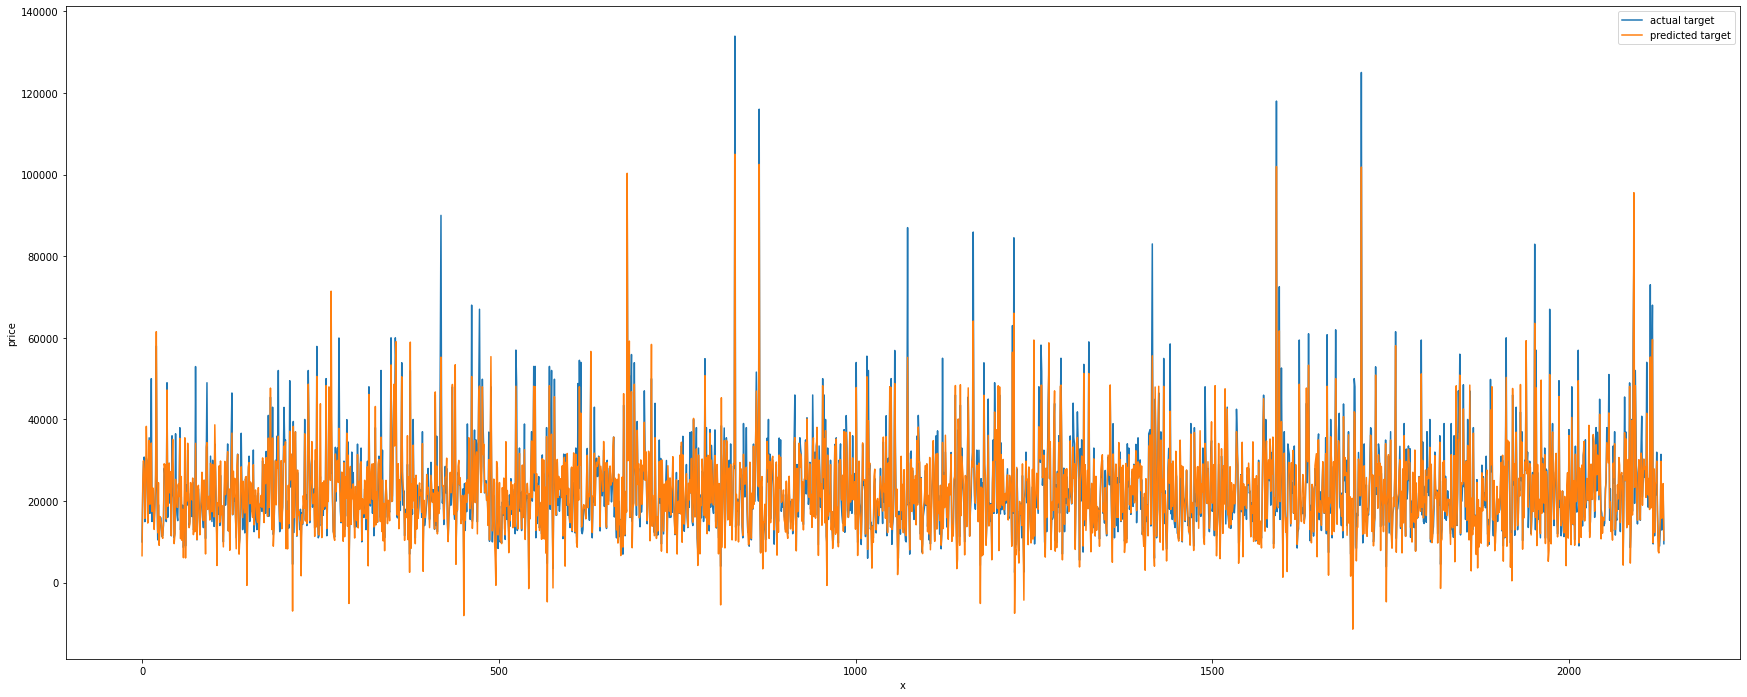

In [245]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

Here, we can see our model predicts mostly lower than actual price. Moreover, it also suggests negative price for some cars which is not practical.

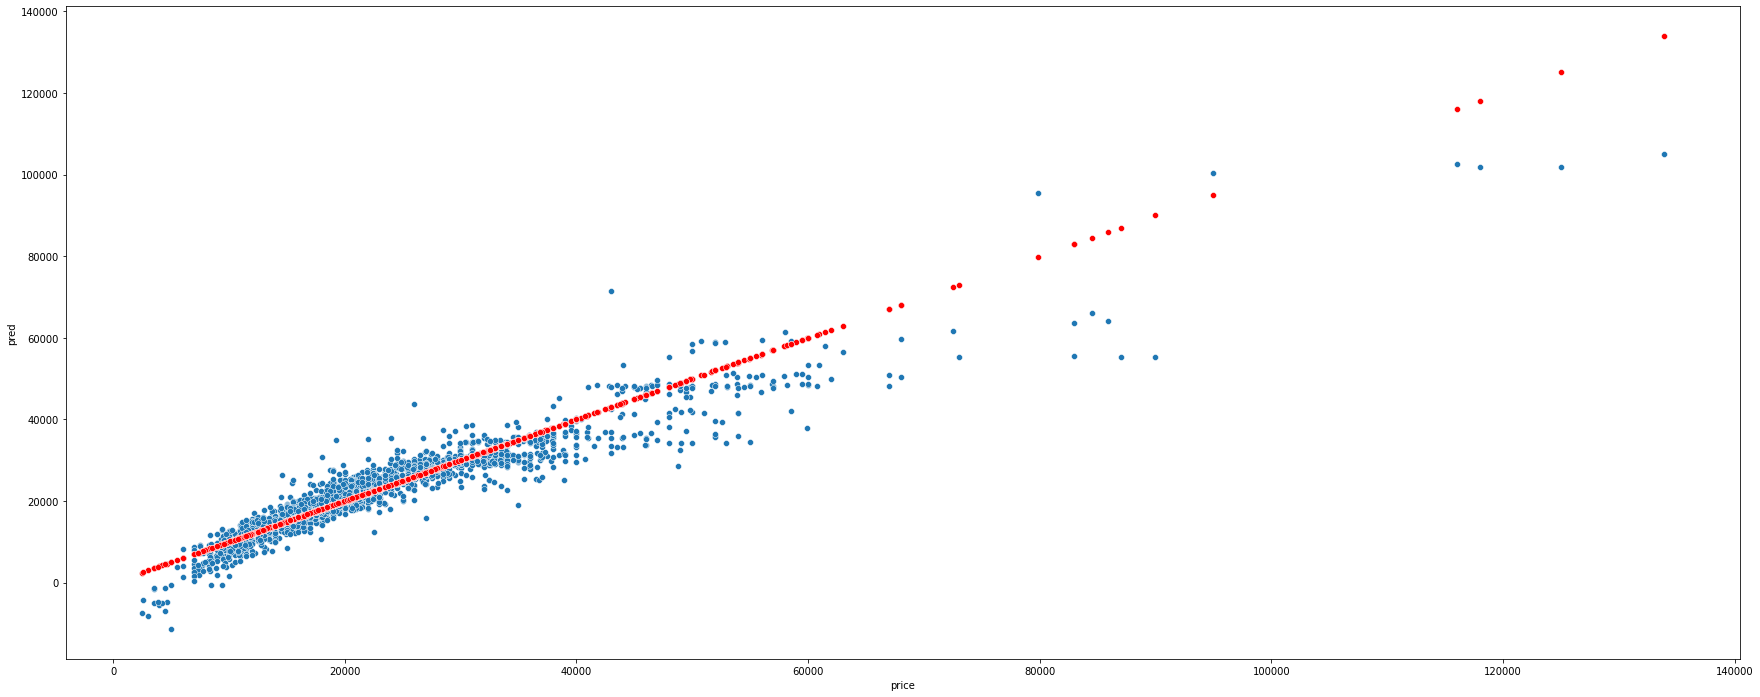

In [246]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()

From this plot, we can see that this linear regression model is not good for predicting because it does not predict price correctly for most of the cars , solution can be cross validation, feature engineering or using another algorithm.